<a href="https://colab.research.google.com/github/NGONGOCHA/Machine-Learning/blob/main/Ch%C6%B0%C6%A1ng_5_BTKN_04_2_k_fold_CV_v%E1%BB%9Bi_m%C3%B4_h%C3%ACnh_ph%C3%A2n_l%E1%BB%9Bp_(H%E1%BB%93i_quy_Logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Quy trình xây dựng k-fold cross-validation

Sau khi chia tập dữ liệu D ban đầu thành 2 tập train – test với tỉ lệ thông thường là 70% - 30%, quá trình huấn luyện diễn ra với tập $D_{train}$ được tiến hành bằng cách lấy ra từ $D_{train}$ một phần nhỏ dữ liệu làm tập dữ liệu kiểm thử cho bước huấn luyện thứ i – gọi là $D_{validation}$. Phần dữ liệu còn lại đóng vai trò là tập dữ liệu huấn luyện. Quá trình này lặp lại nhiều lần cho đến khi mô hình huấn luyện đạt được yêu cầu. Tóm lại, quy trình thực hiện *k-fold cross-validation* (với k thông thường được chọn k = 10 – nên gọi là *10-fold cross-validation*) được tóm tắt như sau:

- Bước 1: Đọc dữ liệu gốc D
- Bước 2: Điều chỉnh dữ liệu
- Bước 3: Chia train – test theo tỉ lệ (thông thường là 70% - 30%)
- Bước 4: Xác định k
- Bước 5: Thực hiện huấn luyện mô hình với k-fold cross validation
- Bước 6: Kiểm định mô hình với tập dữ liệu test

Minh họa quy trình này với 5-fold cross-validation theo ví dụ của sklearn

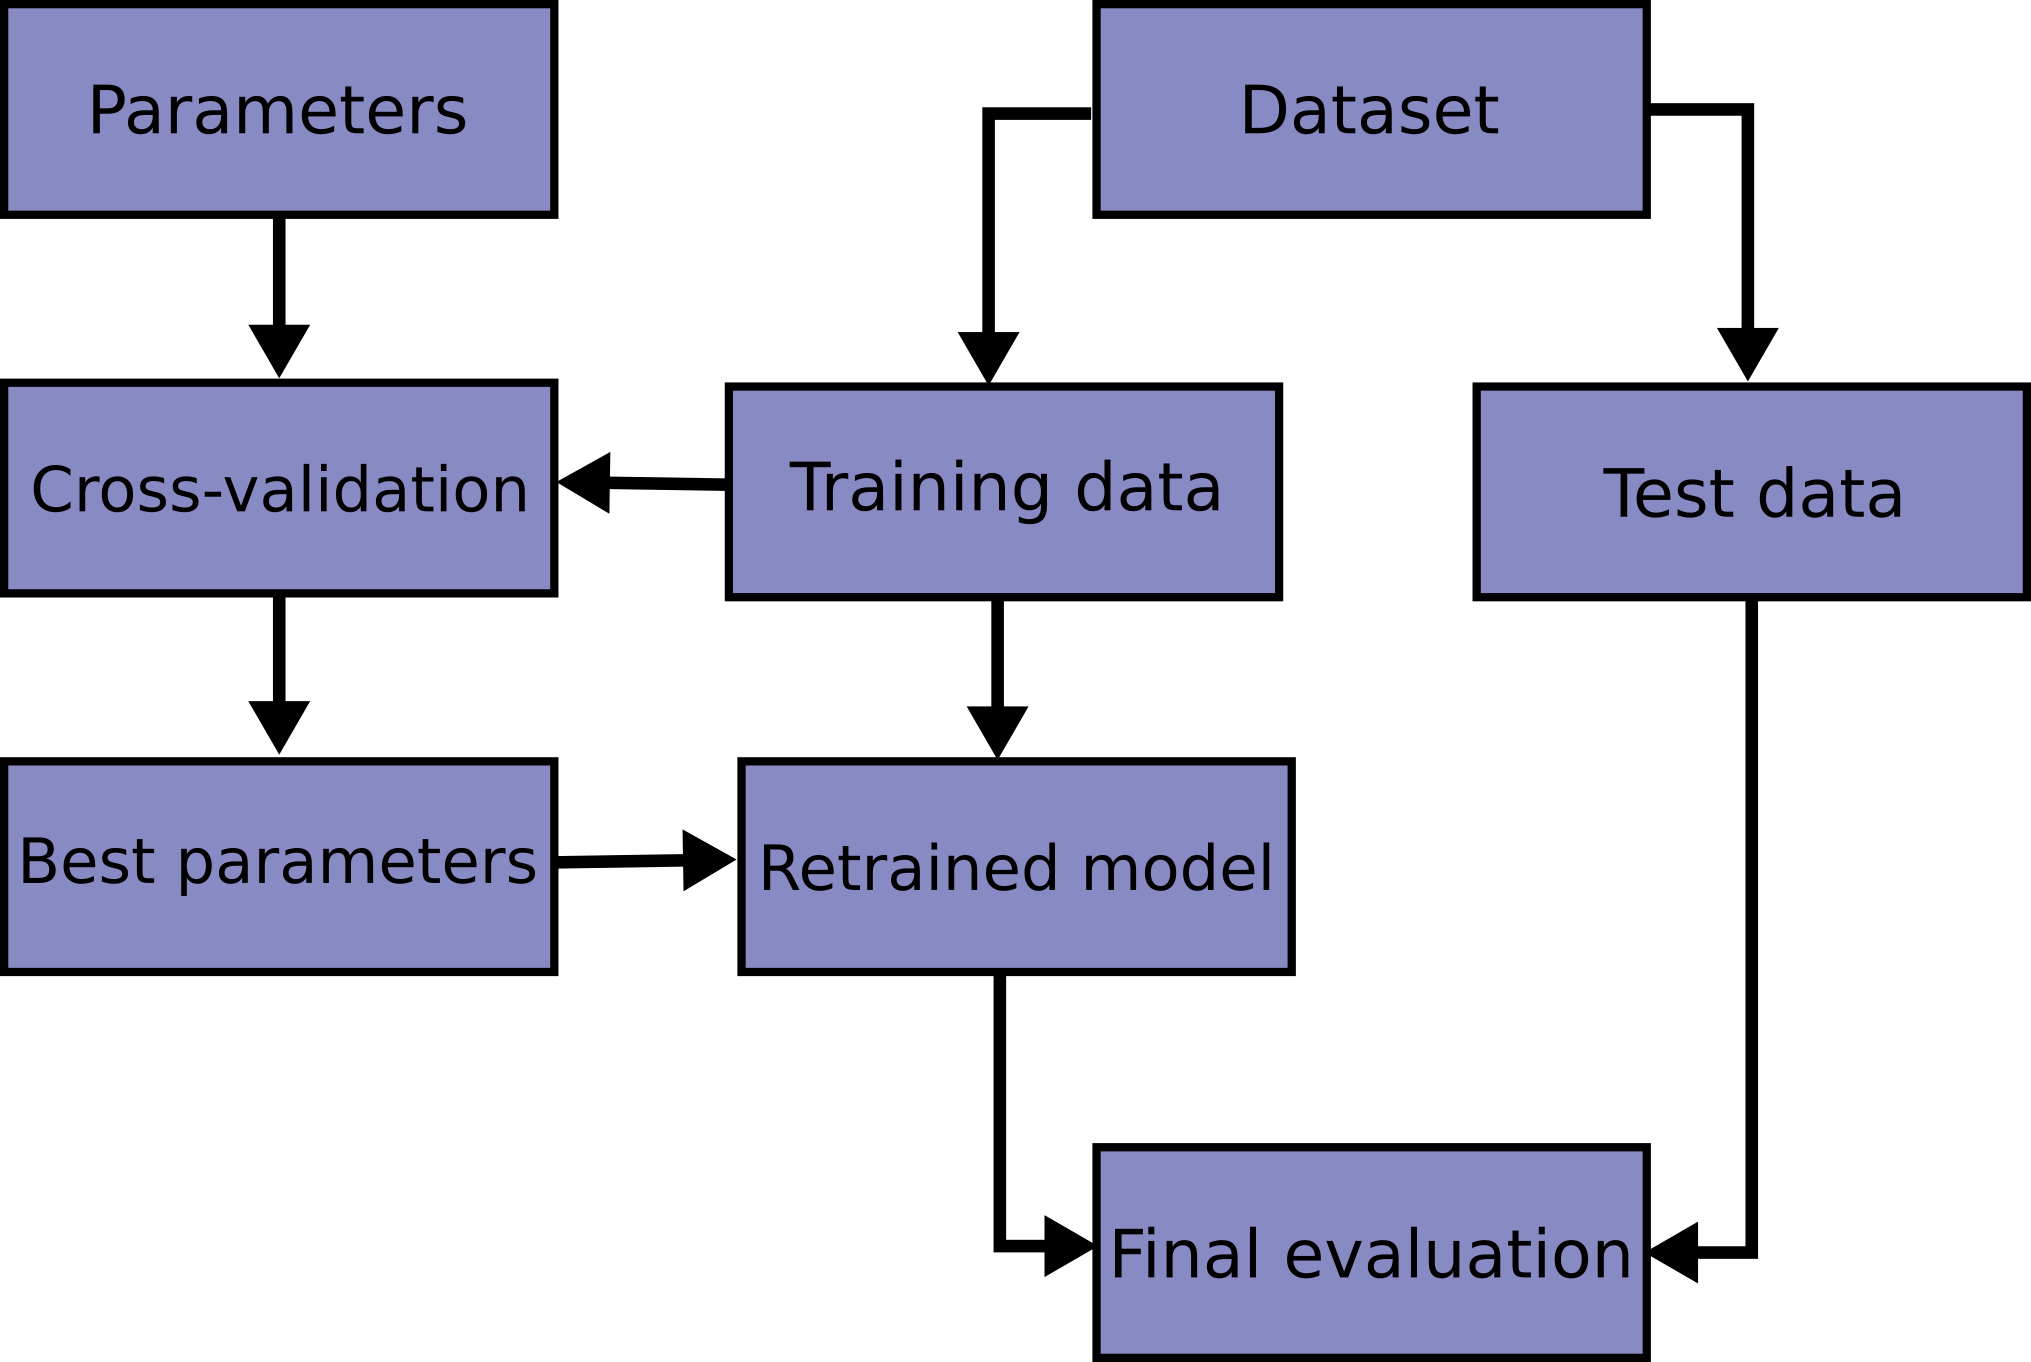

#2. Huấn luyện mô hình hồi quy Logistic với 10-fold cv sử dụng sklearn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bài 1: 
- Đọc dữ liệu (ex2data2.txt);  
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn  hóa X);  
- Phân chia train – test theo tỉ lệ 70% - 30%;  
- Xây dựng mô hình hồi quy Logistic sử dụng sklearn với thuật toán tối ưu là liblinear; số bước lăp là 1500; thiết lập chế độ nhãn lớp là auto; 
- Huấn luyện mô hình sử dụng cross_val_score() với lựa chọn k fold cv là 10, đánh giá mô hình bằng chỉ số accuracy và áp dụng với tập dữ liệu (X_train, y_train); 
- In kết quả huấn luyện ra màn hình.


In [187]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [223]:
def read_data(folder , filename):
    data = np.loadtxt(os.path.join(folder, filename), delimiter=',')
    x = data[:, :-1]
    y = data[:, -1]
    return x, y

In [206]:
def MinMaxScaler(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    return X

In [249]:
def split_train_test(x, y, test_size, random_state = None):
    X_train, y_train = train_test_split(x, y, test_size = 0.3, random_state = 15)
    return X_train, y_train

In [214]:
def kfold_ytrain(ytrain):
   unique, counts = np.unique(ytrain, return_counts=True)
   result = dict(zip(unique, counts))
   return result

In [215]:
def liblinear(model):
    model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')
    return model

In [216]:
def cross_var_score(model, X_train, y_train, cv=10, scoring='accuracy'):
   scores = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
   return scores

In [251]:
def main():
    global model
    x, y = read_data('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở','ex2data2.txt')
    X_train, y_train = split_train_test(x, y, 0.3, 15)
    result = kfold_ytrain(y_train)
    model = liblinear(model)
    scores = cross_var_score(model, X_train, y_train, cv=10, scoring='accuracy')

In [252]:
if __name__ == "__main__":
    main()

Bài 2: 
- Đọc dữ liệu (ex2data2.txt);  
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn  hóa X);  
- Phân chia train – test theo tỉ lệ 90% - 10%;  
- Xây dựng mô hình hồi quy Logistic sử dụng sklearn với thuật toán tối ưu là liblinear; số bước lăp là 1500; thiết lập chế độ nhãn lớp là auto; 
- Thiết lập 10-fold cv bằng ShuffleSplit với tùy chọn n_splits =  10, test_size = 20%; 
- Huấn luyện mô hình sử dụng cross_val_score() với cv được dùng là ShuffleSplit nêu trên, đánh giá mô  hình bằng chỉ số accuracy và áp dụng với tập dữ liệu (X_train, y_train); 
- In kết quả huấn luyện ra màn hình.


In [269]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [271]:
#Bước 1: Đọc dữ liệu
D = np.loadtxt(os.path.join('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt'), delimiter=',')
X, y = D[:, :-1], D[:, -1]
#Bước 2: Điều chỉnh dữ liệu - do đây là mô hình HQTT nên chấp nhận scale cả vector y
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
#Bước 3: Phân chia train - test theo tỉ lệ 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15)

#Số lượng k-fold được xác định tùy thuộc vào số lượng y_train
unique, counts = np.unique(y_train, return_counts=True)
result = dict(zip(unique, counts))
print(result)

#Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
#Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

#Bước 5: Đặc tả 10-fold cv với k = 10, validation size = 20%
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=15)

#Bước 6: Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy'
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

#Bước 7: Thông báo kết quả huấn luyện ra màn hình
print('Kết quả huấn luyên 10-fold cv')
print('\t', scores)

{0.0: 54, 1.0: 52}
Kết quả huấn luyên 10-fold cv
	 [0.54545455 0.31818182 0.5        0.36363636 0.5        0.40909091
 0.31818182 0.5        0.45454545 0.63636364]


Bài 3: 
- Đọc dữ liệu (ex2data2.txt);  
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn  hóa X); 
- Phân chia train – test theo tỉ lệ 70% - 30%;  
- Xây dựng mô hình hồi quy Logistic sử dụng sklearn với thuật toán tối ưu là liblinear; số bước lăp là 1500; thiết lập chế độ nhãn lớp là auto; 
- Huấn luyện mô hình 10-fold cv với  cross_val_predict() áp dụng với tập  dữ liệu (X_train, y_train); 
- In kết quả dự đoán (y_hat) ra màn  hình.

In [272]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [274]:
#Bước 1: Đọc dữ liệu
D = np.loadtxt(os.path.join('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt'), delimiter=',')
X, y = D[:, :-1], D[:, -1]
#Bước 2: Điều chỉnh dữ liệu - do đây là mô hình HQTT nên chấp nhận scale cả vector y
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
#Bước 3: Phân chia train - test theo tỉ lệ 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

#Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
#Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

#Bước 5: Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy' và lấy kết quả dự đoán về
y_hat = cross_val_predict(model, X_train, y_train, cv=10)

#Bước 6: Thông báo kết quả huấn luyện ra màn hình
print('Kết quả huấn luyên 10-fold cv')
print('\t', y_hat)

Kết quả huấn luyên 10-fold cv
	 [0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.]


Bài 4: Sử dụng GridSearchCV để tìm bộ tham số tối ưu cho mô hình. Với hồi quy  Logistic, chúng ta tìm giá trị tối ưu cho tham  số C áp dụng trong quá trình điều tiết  (regularization) tránh hiện tượng  
overfitting. 
- Đọc dữ liệu (ex2data2.txt);  
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn  hóa X);  
- Phân chia train – test theo tỉ lệ 70% - 30%;  
- Xây dựng mô hình hồi quy Logistic sử dụng sklearn với thuật toán tối ưu là liblinear; số bước lăp là 1500; thiết lập chế độ nhãn lớp là auto; 
- Tạo bộ tham số C có giá trị 1, 10, 20,  50; 
- Tạo GridSearchCV với mô hình hồi  quy Logistic, cv = 10 và bộ tham số  ở trên; 
- Áp dụng với (X_train, y_train) 
- In ra màn hình giá trị C tối ưu (best_params_) của mô hình GridSearchCV ở trên; 
- Sử dụng mô hình GridSearchCV để dự đoán y_hat cho tập X_test 
- Đánh giá hiệu năng của mô hình bằng accuracy_score đối với tập (y_hat, y_test)

In [275]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [276]:
#Bước 1: Đọc dữ liệu
D = np.loadtxt(os.path.join('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt'), delimiter=',')
X, y = D[:, :-1], D[:, -1]
#Bước 2: Điều chỉnh dữ liệu - do đây là mô hình HQTT nên chấp nhận scale cả vector y
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
#Bước 3: Phân chia train - test theo tỉ lệ 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

#Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
#Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

#Bước 5: Đặc tả 10-fold cv với k = 10
parameters = {'C':[1, 10, 20, 50]}
cv = GridSearchCV(model, parameters, cv=10)

#Bước 6: Huấn luyện mô hình và lấy kết quả tối ưu
cv.fit(X_train, y_train)

#Bước 7: Thông báo kết quả tối ưu
print('Kết quả huấn luyên 10-fold cv')
print('\t', cv.best_params_)

#Bước 8: Tạo mô hình LogisticRegression với best param
#model.set_params(**cv.best_params_)
#model.fit(X_train, y_train)
y_hat = cv.predict(X_test)

#Bước 9 đánh giá hiệu năng mô hình
print('Hiệu năng mô hình acc: ', accuracy_score(y_hat, y_test))

Kết quả huấn luyên 10-fold cv
	 {'C': 1}
Hiệu năng mô hình acc:  0.5


Bài 5: Sử dụng LogisticRegressionCV để  đơn giản hóa quá trình huấn luyện mô hình  với k-fold cross-validation. 
- Đọc dữ liệu (ex2data2.txt);  
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn  hóa X); 
- Phân chia train – test theo tỉ lệ 70% - 30%;  
- Khởi tạo mô hình LogisticRegressionCV với tùy chọn  cv=10, random_state = số nguyên tùy bạn và áp dụng với tập (X_train, y_train); 
- Sử dụng mô hình ở trên để dự đoán y_hat đối với tập X_test; 
- Đánh giá hiệu năng của mô hình bằng accuracy_score đối với tập  
(y_hat, y_test).

In [277]:
from sklearn.linear_model import LogisticRegressionCV
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [279]:
#Bước 1: Đọc dữ liệu
D = np.loadtxt(os.path.join('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt'), delimiter=',')
X, y = D[:, :-1], D[:, -1]
#Bước 2: Điều chỉnh dữ liệu - do đây là mô hình HQTT nên chấp nhận scale cả vector y
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
#Bước 3: Phân chia train - test theo tỉ lệ 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

#Bước 4 Tạo mô hình và huấn luyen 10-foldCV
model = LogisticRegressionCV(cv=10, random_state=15).fit(X_train, y_train)

#Bước 5: Dự đoán và đánh giá hiệu năng
y_hat = model.predict(X_test)

#Bước 6 đánh giá hiệu năng mô hình
print('Hiệu năng mô hình acc: ', accuracy_score(y_hat, y_test))

Hiệu năng mô hình acc:  0.5
